In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import linregress
#!pip install backtrader
import backtrader as bt

## Strategies with MAs

### Strategy 1 with Simple Moving Averages: Golden Cross and Death Cross

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\4128886022.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\4128886022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = 0
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\4128886022.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

                 Price
Date                  
2010-01-05    6.435713
2010-01-06    6.333344
2010-01-07    6.321635
2010-01-08    6.363665
2010-01-11    6.307528
...                ...
2025-07-01  207.584412
2025-07-02  212.199173
2025-07-03  213.307922
2025-07-07  209.711990
2025-07-08  209.771927

[3900 rows x 1 columns]
                 Price    Short_MA     Long_MA
Date                                          
2010-01-05    6.435713         NaN         NaN
2010-01-06    6.333344         NaN         NaN
2010-01-07    6.321635         NaN         NaN
2010-01-08    6.363665         NaN         NaN
2010-01-11    6.307528         NaN         NaN
...                ...         ...         ...
2025-07-01  207.584412  200.996887  222.504213
2025-07-02  212.199173  201.118748  222.456519
2025-07-03  213.307922  201.341496  222.415712
2025-07-07  209.711990  201.603199  222.387682
2025-07-08  209.771927  201.891205  222.357613

[3900 rows x 3 columns]


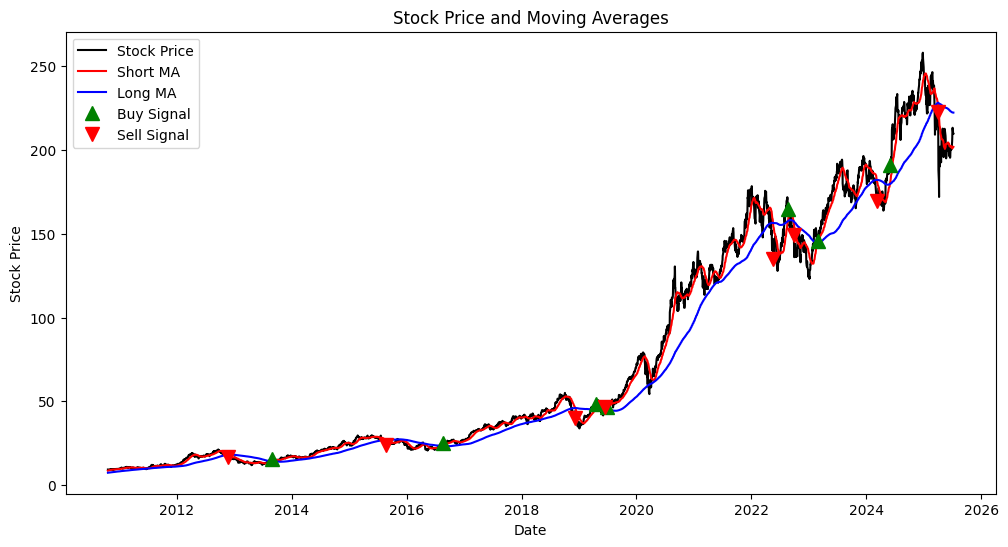

                 Price    Short_MA     Long_MA  Signal  Position
Date                                                            
2010-10-20    9.322145    8.646354    7.398149       0       0.0
2010-10-21    9.291829    8.692835    7.412941       0       0.0
2010-10-22    9.230285    8.736925    7.427484       0       0.0
2010-10-25    9.271415    8.778753    7.442023       0       0.0
2010-10-26    9.247701    8.818770    7.456724       0       0.0
...                ...         ...         ...     ...       ...
2025-07-01  207.584412  200.996887  222.504213      -1       0.0
2025-07-02  212.199173  201.118748  222.456519      -1       0.0
2025-07-03  213.307922  201.341496  222.415712      -1       0.0
2025-07-07  209.711990  201.603199  222.387682      -1       0.0
2025-07-08  209.771927  201.891205  222.357613      -1       0.0

[3700 rows x 5 columns]


In [2]:
def download_data(stock, start_date, end_date):
    data = pd.DataFrame()
    ticker = stock
    ticker = yf.download(stock, start=start_date, end=end_date)
    data['Price'] = ticker['Close']
    return data

def construct_signals(data, short_window, long_window):
    print(data)
    data['Short_MA'] = data['Price'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Price'].rolling(window=long_window).mean()
    data = data.dropna()
    data['Signal'] = 0
    data.loc[data.index[short_window:], 'Signal'] = np.where(
    data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1)
    data['Position'] = data['Signal'].diff()
    return data


def plot_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Price'], label = 'Stock Price', color = 'black')
    plt.plot(data['Short_MA'], label = 'Short MA', color = 'red')
    plt.plot(data['Long_MA'], label = 'Long MA', color = 'blue')
    buy_signals = data[data['Position'] == 2]
    sell_signals = data[data['Position'] == -2]

    plt.plot(buy_signals.index, buy_signals['Price'], '^', markersize=10, color='green', label='Buy Signal')
    plt.plot(sell_signals.index, sell_signals['Price'], 'v', markersize=10, color='red', label='Sell Signal')

    plt.title('Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

if __name__ == '__main__':
  start = '2010-01-05'
  end = '2025-07-09'
  stock_data = download_data('AAPL', start, end)
  construct_signals(stock_data, 30,200)
  stock_data = construct_signals(stock_data, 30, 200)
  plot_data(stock_data)
  stock_data = stock_data.dropna()
  print(stock_data)




C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3980198952.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


                 Price
Date                  
2010-01-05    6.435713
2010-01-06    6.333344
2010-01-07    6.321635
2010-01-08    6.363665
2010-01-11    6.307528
...                ...
2025-07-01  207.584412
2025-07-02  212.199173
2025-07-03  213.307922
2025-07-07  209.711990
2025-07-08  209.771927

[3900 rows x 1 columns]


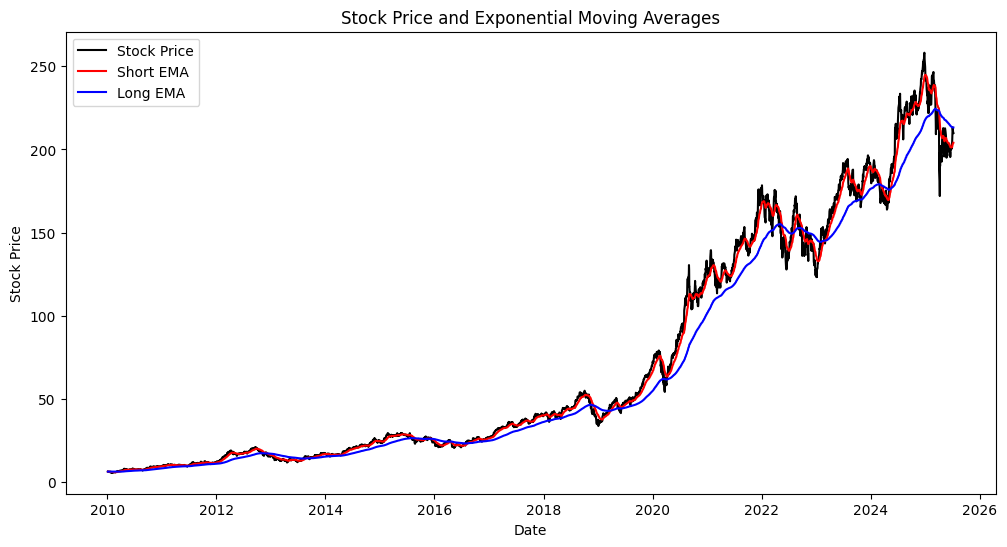

                 Price   Short_EMA    Long_EMA
Date                                          
2010-01-05    6.435713    6.435713    6.435713
2010-01-06    6.333344    6.429108    6.434694
2010-01-07    6.321635    6.422175    6.433569
2010-01-08    6.363665    6.418400    6.432874
2010-01-11    6.307528    6.411247    6.431626
...                ...         ...         ...
2025-07-01  207.584412  201.840275  213.259701
2025-07-02  212.199173  202.508591  213.249149
2025-07-03  213.307922  203.205322  213.249734
2025-07-07  209.711990  203.625107  213.214532
2025-07-08  209.771927  204.021676  213.180277

[3900 rows x 3 columns]


In [3]:
def download_data(stock, start_date, end_date):
    data = pd.DataFrame()
    ticker = stock
    ticker = yf.download(stock, start=start_date, end=end_date)
    data['Price'] = ticker['Close']
    return data

def construct_signals(data, short_period, long_period):
    print(data)
    data['Short_EMA'] = data['Price'].ewm(span=short_period, adjust = False).mean()
    data['Long_EMA'] = data['Price'].ewm(span=long_period, adjust = False).mean()
    data = data.dropna()

def plot_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Price'], label = 'Stock Price', color = 'black')
    plt.plot(data['Short_EMA'], label = 'Short EMA', color = 'red')
    plt.plot(data['Long_EMA'], label = 'Long EMA', color = 'blue')
    plt.title('Stock Price and Exponential Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

if __name__ == '__main__':
  start = '2010-01-05'
  end = '2025-07-09'
  stock_data = download_data('AAPL', start, end)
  construct_signals(stock_data, 30,200)
  plot_data(stock_data)
  stock_data = stock_data.dropna()
  print(stock_data)


## With Classes

### Long Strategy -- the instructor code, maybe wrong


C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\2269733617.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


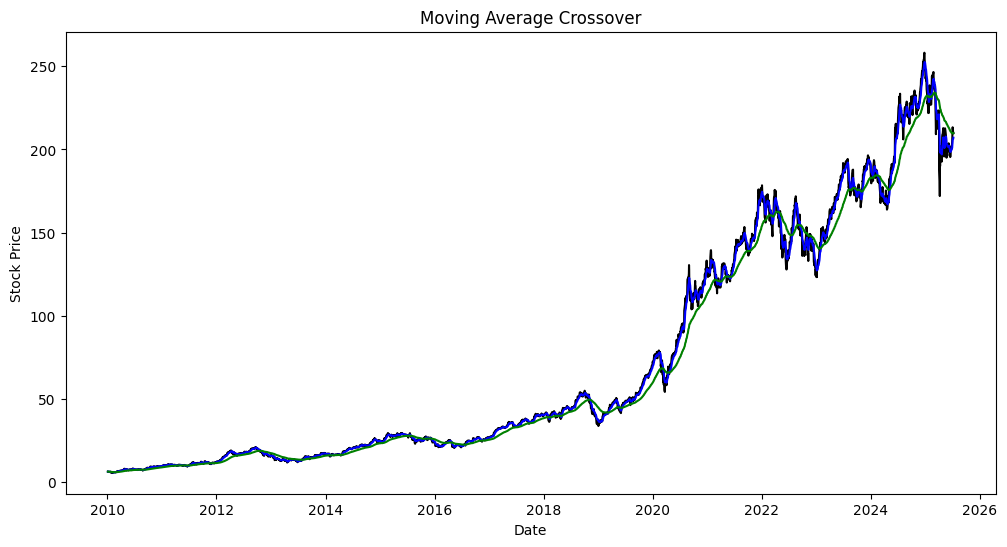

BUY on 2010-01-05 at $6.44
SELL on 2010-01-06 at $6.33
BUY on 2010-03-02 at $6.27
SELL on 2010-08-23 at $7.38
BUY on 2010-09-07 at $7.74
SELL on 2011-05-26 at $10.06
BUY on 2011-05-31 at $10.44
SELL on 2011-06-09 at $9.95
BUY on 2011-07-05 at $10.49
SELL on 2011-11-22 at $11.30
BUY on 2011-12-05 at $11.80
SELL on 2012-10-25 at $18.38
BUY on 2013-08-01 at $14.00
SELL on 2014-02-03 at $15.57
BUY on 2014-02-11 at $16.74
SELL on 2014-04-15 at $16.18
BUY on 2014-04-22 at $16.61
SELL on 2015-07-09 at $26.86
BUY on 2015-07-14 at $28.10
SELL on 2015-07-29 at $27.51
BUY on 2015-10-30 at $26.85
SELL on 2015-11-17 at $25.66
BUY on 2015-11-19 at $26.81
SELL on 2015-12-11 at $25.54
BUY on 2016-03-22 at $24.22
SELL on 2016-04-27 at $22.20
BUY on 2016-07-28 at $23.82
SELL on 2018-02-05 at $36.68
BUY on 2018-02-16 at $40.59
SELL on 2018-04-24 at $38.35
BUY on 2018-05-03 at $41.64
SELL on 2018-11-12 at $46.20
BUY on 2019-03-12 at $43.23
SELL on 2019-05-23 at $43.10
BUY on 2019-06-12 at $46.58
SELL on 2

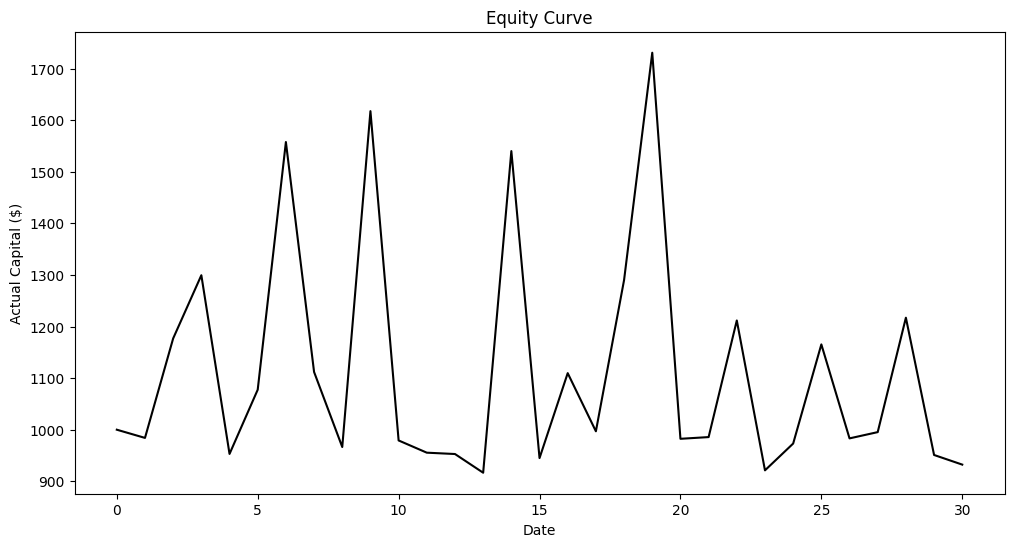

In [4]:
class MovingAverageCrossover:
  def __init__(self, capital, stock, start_date, end_date, short_period, long_period):
    self.data = None
    self.is_long = False
    self.capital = capital
    self.equity = [capital]
    self.stock = stock
    self.start_date = start_date
    self.end_date = end_date
    self.short_period = short_period
    self.long_period = long_period
    self.end = end


  def download_data(self):
    ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
    self.data = pd.DataFrame()
    self.data['Price'] = ticker['Close']
    return self.data

  def simulate(self):
    # we consider all the trading days and decide whether to open a long position or not
    price_when_buy = 0
    for index, row in self.data.iterrows():
        # Close the long position we have opened
        if row['short_ma'] < row['long_ma'] and self.is_long:  # sell only when there is an active long position
            self.equity.append(self.capital * row.Price / price_when_buy)
            self.is_long = False
            print(f"SELL on {index.date()} at ${row['Price']:.2f}")
        elif row['short_ma'] > row['long_ma'] and not self.is_long:  # buy only when there is no active long position
            price_when_buy = row['Price']
            self.is_long = True
            print(f"BUY on {index.date()} at ${row['Price']:.2f}")

  def construct_signals(self):
    self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
    self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
    self.data

  def plot_signals(self):
    plt.figure(figsize=(12, 6))
    plt.plot(self.data.Price, label = 'Stock Price', color = 'black')
    plt.plot(self.data.short_ma, label = 'Short MA', color = 'blue')
    plt.plot(self.data.long_ma, label = 'Long MA', color = 'green')
    plt.title('Moving Average Crossover')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

  def plot_equity(self):
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    print("Actual Capital: $%0.2f" % self.equity[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(self.equity, label = 'Stock Price', color = 'black')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Actual Capital ($)')
    plt.show()

if __name__ == '__main__':
  start_date = '2010-01-05'
  end_date = '2025-07-10'
  strategy = MovingAverageCrossover(1000, 'AAPL', '2010-01-01', '2025-07-09', 10, 100)
  strategy.download_data()
  strategy.construct_signals()
  strategy.plot_signals()
  strategy.simulate()
  strategy.equity
  strategy.plot_equity()


###GPTs code - maybe correct afterall

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\544716806.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


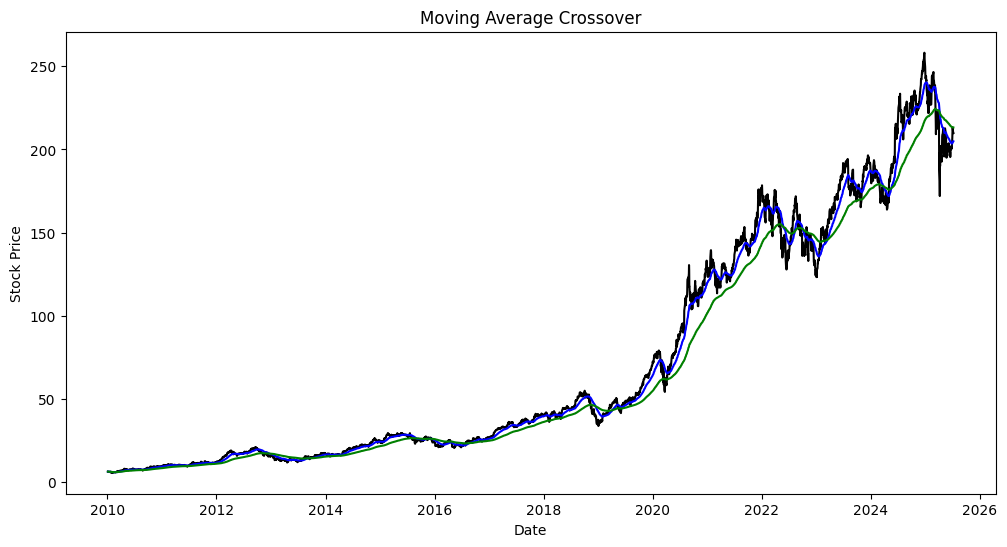

2010-01-05 - OPEN LONG at $6.44
2010-01-06 - CLOSE LONG at $6.33
2010-03-08 - OPEN LONG at $6.58
2012-12-20 - CLOSE LONG at $15.80
2013-09-09 - OPEN LONG at $15.62
2015-09-04 - CLOSE LONG at $24.56
2015-11-23 - OPEN LONG at $26.57
2015-12-16 - CLOSE LONG at $25.13
2016-08-23 - OPEN LONG at $24.98
2018-12-14 - CLOSE LONG at $39.37
2019-04-08 - OPEN LONG at $47.82
2022-05-26 - CLOSE LONG at $141.35
2022-08-11 - OPEN LONG at $165.87
2022-10-04 - CLOSE LONG at $143.83
2023-03-17 - OPEN LONG at $153.08
2024-03-27 - CLOSE LONG at $172.07
2024-05-20 - OPEN LONG at $189.94
2025-04-08 - CLOSE LONG at $172.00
Profit of the trading strategy: 1344.88%
Actual Capital: $14448.83


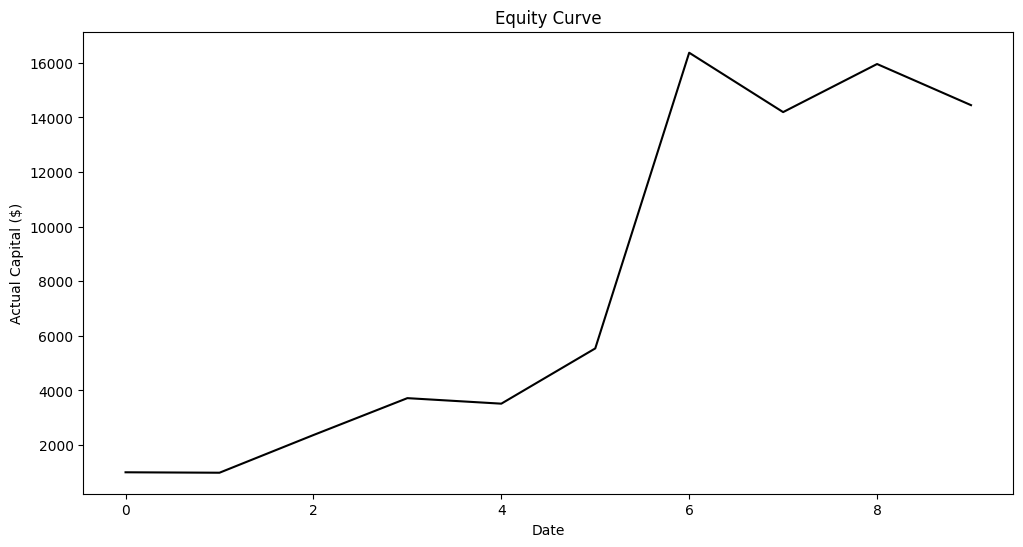

In [5]:
class MovingAverageCrossover:
  def __init__(self, capital, stock, start_date, end_date, short_period, long_period):
    self.data = None
    self.is_long = False
    self.capital = capital
    self.equity = [capital]
    self.stock = stock
    self.start_date = start_date
    self.end_date = end_date
    self.short_period = short_period
    self.long_period = long_period
    self.end = end


  def download_data(self):
    ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
    self.data = pd.DataFrame()
    self.data['Price'] = ticker['Close']
    return self.data

  def simulate(self):
    price_entry = 0
    self.is_long = False
    self.equity_dates = [self.data.index[0]]  # track dates for equity plotting
    self.equity = [self.capital]              # reset equity curve

    for index, row in self.data.iterrows():
        price = row['Price']
        short_ma = row['short_ma']
        long_ma = row['long_ma']

        # --- Exit LONG position ---
        if self.is_long and short_ma < long_ma:
            self.capital *= price / price_entry  # price has gone up
            self.equity.append(self.capital)
            self.equity_dates.append(index)
            print(f"{index.date()} - CLOSE LONG at ${price:.2f}")
            self.is_long = False

        # --- Enter LONG position ---
        elif not self.is_long and short_ma > long_ma:
            price_entry = price
            self.is_long = True
            print(f"{index.date()} - OPEN LONG at ${price:.2f}")


  def construct_signals(self):
    self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
    self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
    self.data

  def plot_signals(self):
    plt.figure(figsize=(12, 6))
    plt.plot(self.data.Price, label = 'Stock Price', color = 'black')
    plt.plot(self.data.short_ma, label = 'Short MA', color = 'blue')
    plt.plot(self.data.long_ma, label = 'Long MA', color = 'green')
    plt.title('Moving Average Crossover')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

  def plot_equity(self):
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    print("Actual Capital: $%0.2f" % self.equity[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(self.equity, label = 'Stock Price', color = 'black')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Actual Capital ($)')
    plt.show()

if __name__ == '__main__':
  start_date = '2010-01-05'
  end_date = '2025-07-10'
  strategy = MovingAverageCrossover(1000, 'AAPL', '2010-01-01', '2025-07-09', 50, 200)
  strategy.download_data()
  strategy.construct_signals()
  strategy.plot_signals()
  strategy.simulate()
  strategy.equity
  strategy.plot_equity()


## Short Strategy

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\657292329.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


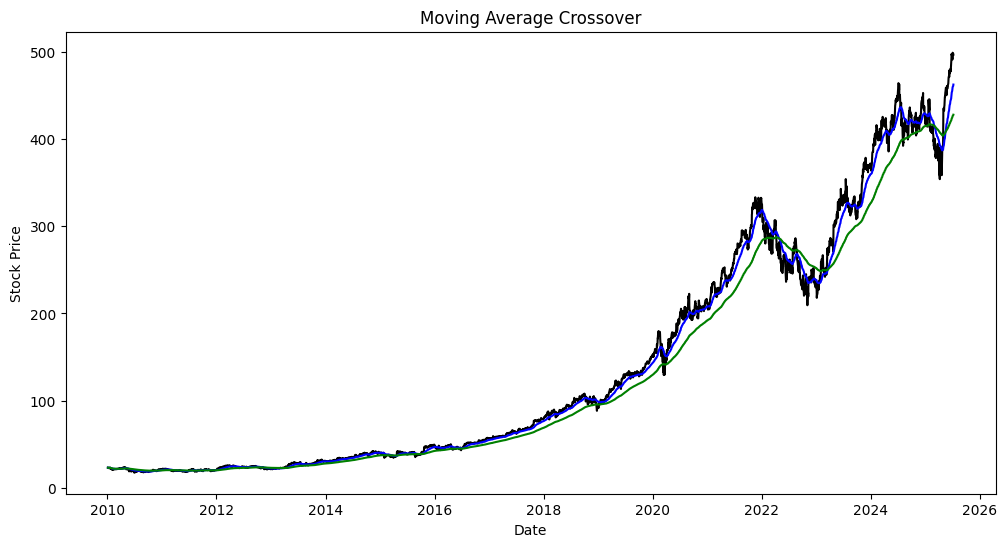

2010-01-06 - OPEN SHORT at 23.08
2010-01-19 - CLOSE SHORT at 23.32
2010-01-21 - OPEN SHORT at 22.51
2010-03-29 - CLOSE SHORT at 22.30
2010-05-21 - OPEN SHORT at 20.31
2010-12-13 - CLOSE SHORT at 20.86
2011-03-23 - OPEN SHORT at 19.67
2011-07-25 - CLOSE SHORT at 21.63
2011-08-19 - OPEN SHORT at 18.76
2011-09-12 - CLOSE SHORT at 20.20
2012-11-14 - OPEN SHORT at 21.69
2013-04-09 - CLOSE SHORT at 24.13
2015-03-25 - OPEN SHORT at 35.72
2015-04-29 - CLOSE SHORT at 42.26
2022-04-28 - OPEN SHORT at 281.81
2023-03-21 - CLOSE SHORT at 269.00
2025-03-04 - OPEN SHORT at 387.90
2025-05-16 - CLOSE SHORT at 454.27
Profit of the trading strategy: -44.18%
Actual Capital: $558.19


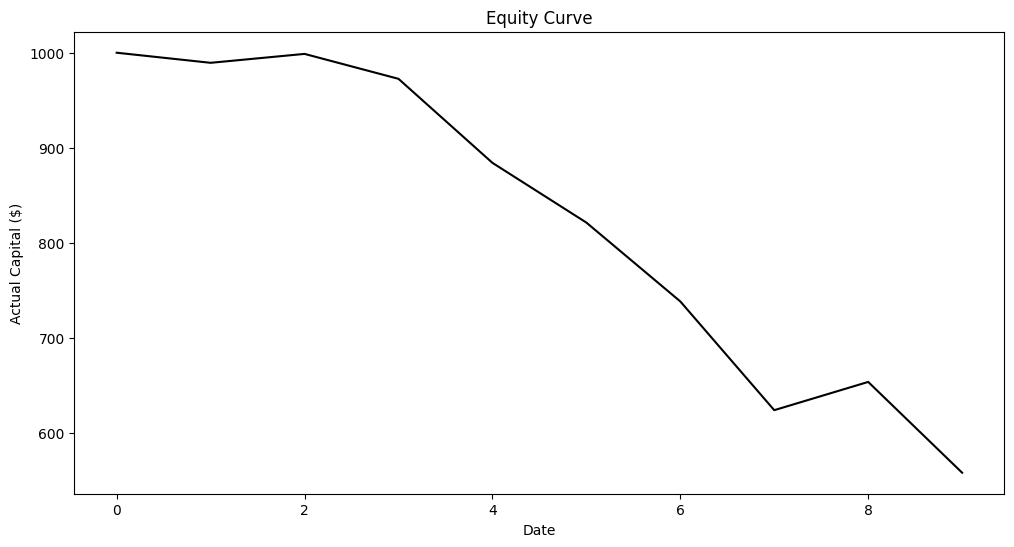

In [6]:
class MovingAverageCrossover:
  def __init__(self, capital, stock, start_date, end_date, short_period, long_period):
    self.data = None
    self.is_short = False
    self.capital = capital
    self.equity = [capital]
    self.stock = stock
    self.start_date = start_date
    self.end_date = end_date
    self.short_period = short_period
    self.long_period = long_period
    self.end = end


  def download_data(self):
    ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
    self.data = pd.DataFrame()
    self.data['Price'] = ticker['Close']
    return self.data

  def simulate(self):
    price_entry = 0
    self.is_short = False

    for index, row in self.data.iterrows():
        price = row['Price']
        short_ma = row['short_ma']
        long_ma = row['long_ma']

        # Exit SHORT position
        if self.is_short and short_ma > long_ma:
            self.capital = self.capital * (price_entry / price)  # profit if price has fallen
            self.equity.append(self.capital)
            print(f"{index.date()} - CLOSE SHORT at {price:.2f}")
            self.is_short = False

        # Enter SHORT position
        elif not self.is_short and short_ma < long_ma:
            price_entry = price
            self.is_short = True
            print(f"{index.date()} - OPEN SHORT at {price:.2f}")


  def construct_signals(self):
    self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
    self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
    self.data

  def plot_signals(self):
    plt.figure(figsize=(12, 6))
    plt.plot(self.data.Price, label = 'Stock Price', color = 'black')
    plt.plot(self.data.short_ma, label = 'Short MA', color = 'blue')
    plt.plot(self.data.long_ma, label = 'Long MA', color = 'green')
    plt.title('Moving Average Crossover')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

  def plot_equity(self):
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    print("Actual Capital: $%0.2f" % self.equity[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(self.equity, label = 'Stock Price', color = 'black')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Actual Capital ($)')
    plt.show()

if __name__ == '__main__':
  start_date = '2010-01-05'
  end_date = '2025-07-10'
  strategy = MovingAverageCrossover(1000, 'MSFT', '2010-01-01', '2025-07-09', 50, 200)
  strategy.download_data()
  strategy.construct_signals()
  strategy.plot_signals()
  strategy.simulate()
  strategy.equity
  strategy.plot_equity()


## Long and Short Strategy

/tmp/ipython-input-7-1818011913.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


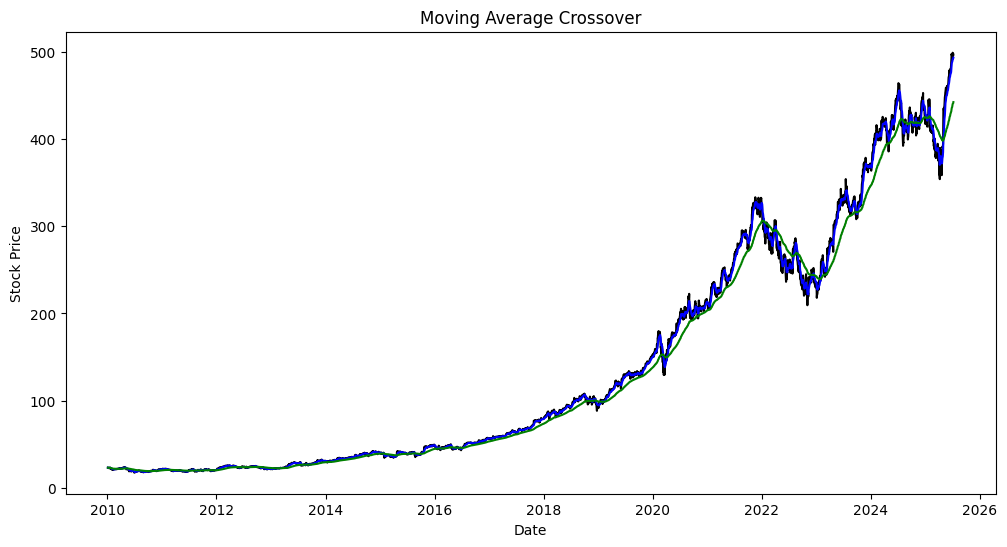

2010-01-05 - OPEN LONG at 23.22
2010-01-06 - CLOSE LONG at 23.08
2010-01-07 - OPEN SHORT at 22.84
2010-01-19 - CLOSE SHORT at 23.32
2010-01-20 - OPEN LONG at 22.94
2010-01-21 - CLOSE LONG at 22.51
2010-01-22 - OPEN SHORT at 21.72
2010-03-15 - CLOSE SHORT at 22.07
2010-03-16 - OPEN LONG at 22.13
2010-05-11 - CLOSE LONG at 21.76
2010-05-12 - OPEN SHORT at 22.18
2010-10-26 - CLOSE SHORT at 19.71
2010-10-27 - OPEN LONG at 19.82
2011-02-28 - CLOSE LONG at 20.47
2011-03-01 - OPEN SHORT at 20.15
2011-07-01 - CLOSE SHORT at 20.17
2011-07-05 - OPEN LONG at 20.18
2011-08-10 - CLOSE LONG at 18.76
2011-08-11 - OPEN SHORT at 19.53
2011-09-01 - CLOSE SHORT at 20.45
2011-09-02 - OPEN LONG at 20.13
2011-09-30 - CLOSE LONG at 19.42
2011-10-03 - OPEN SHORT at 19.13
2011-10-07 - CLOSE SHORT at 20.48
2011-10-10 - OPEN LONG at 21.01
2011-11-21 - CLOSE LONG at 19.65
2011-11-22 - OPEN SHORT at 19.48
2011-12-23 - CLOSE SHORT at 20.46
2011-12-27 - OPEN LONG at 20.47
2012-05-22 - CLOSE LONG at 23.70
2012-05-23 

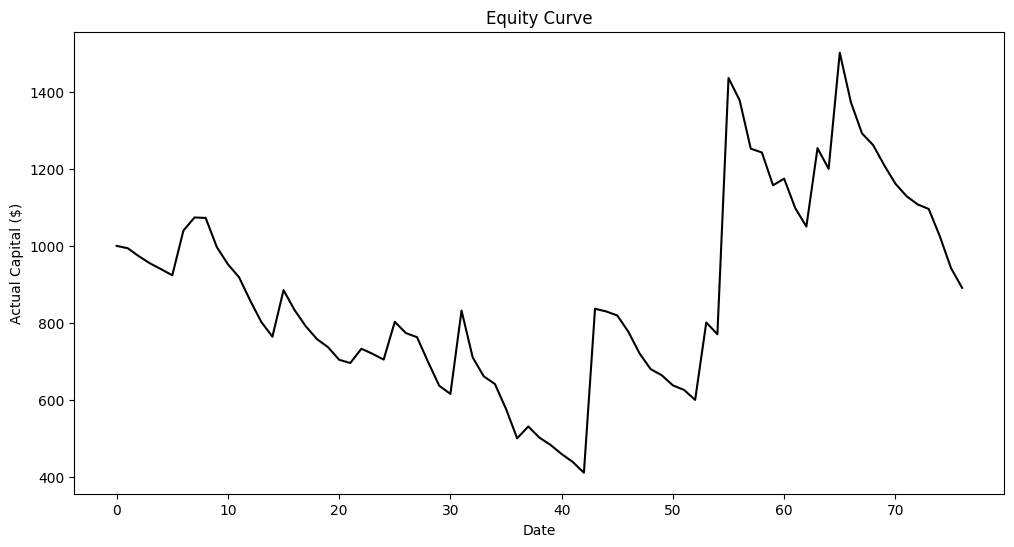

In [ ]:
class MovingAverageCrossover:
  def __init__(self, capital, stock, start_date, end_date, short_period, long_period):
    self.data = None
    self.is_short = False
    self.capital = capital
    self.equity = [capital]
    self.stock = stock
    self.start_date = start_date
    self.end_date = end_date
    self.short_period = short_period
    self.long_period = long_period
    self.end = end


  def download_data(self):
    ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
    self.data = pd.DataFrame()
    self.data['Price'] = ticker['Close']
    return self.data

  def simulate(self):
    price_entry = 0
    self.is_long = False
    self.is_short = False

    for index, row in self.data.iterrows():
        price = row['Price']
        short_ma = row['short_ma']
        long_ma = row['long_ma']

        # Close LONG position
        if self.is_long and short_ma < long_ma:
            self.capital = self.capital * (price / price_entry)
            self.equity.append(self.capital)
            print(f"{index.date()} - CLOSE LONG at {price:.2f}")
            self.is_long = False

        # Close SHORT position
        elif self.is_short and short_ma > long_ma:
            self.capital = self.capital * (price_entry / price)
            self.equity.append(self.capital)
            print(f"{index.date()} - CLOSE SHORT at {price:.2f}")
            self.is_short = False

        # Open LONG position
        elif not self.is_long and not self.is_short and short_ma > long_ma:
            price_entry = price
            self.is_long = True
            print(f"{index.date()} - OPEN LONG at {price:.2f}")

        # Open SHORT position
        elif not self.is_short and not self.is_long and short_ma < long_ma:
            price_entry = price
            self.is_short = True
            print(f"{index.date()} - OPEN SHORT at {price:.2f}")



  def construct_signals(self):
    self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
    self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
    self.data

  def plot_signals(self):
    plt.figure(figsize=(12, 6))
    plt.plot(self.data.Price, label = 'Stock Price', color = 'black')
    plt.plot(self.data.short_ma, label = 'Short MA', color = 'blue')
    plt.plot(self.data.long_ma, label = 'Long MA', color = 'green')
    plt.title('Moving Average Crossover')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

  def plot_equity(self):
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    print("Actual Capital: $%0.2f" % self.equity[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(self.equity, label = 'Stock Price', color = 'black')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Actual Capital ($)')
    plt.show()

if __name__ == '__main__':
  start_date = '2010-01-05'
  end_date = '2025-07-10'
  strategy = MovingAverageCrossover(1000, 'MSFT', '2010-01-01', '2025-07-09', 10, 100)
  strategy.download_data()
  strategy.construct_signals()
  strategy.plot_signals()
  strategy.simulate()
  strategy.equity
  strategy.plot_equity()


C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\1854497249.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Price,return,move,up,down,average_gain,average_loss,RSI
Date,,,,,,,,
2010-01-05,6.435713,0.001728,0.011108,0.011108,0.000000,0.000793,0.000000,100.000000
2010-01-06,6.333345,-0.016034,-0.102367,0.000000,-0.102367,0.000737,0.007312,9.154000
2010-01-07,6.321634,-0.001851,-0.011712,0.000000,-0.011712,0.000684,0.007626,8.232535
2010-01-08,6.363665,0.006627,0.042031,0.042031,0.000000,0.003637,0.007081,33.935028
2010-01-11,6.307528,-0.008861,-0.056137,0.000000,-0.056137,0.003378,0.010585,24.189962
...,...,...,...,...,...,...,...,...
2025-06-24,200.072937,-0.005973,-1.198639,0.000000,-1.198639,1.097087,1.163518,48.530670
2025-06-25,201.331512,0.006271,1.258575,1.258575,0.000000,1.108621,1.080410,50.644392
2025-06-26,200.772141,-0.002782,-0.559372,0.000000,-0.559372,1.029434,1.043193,49.668093


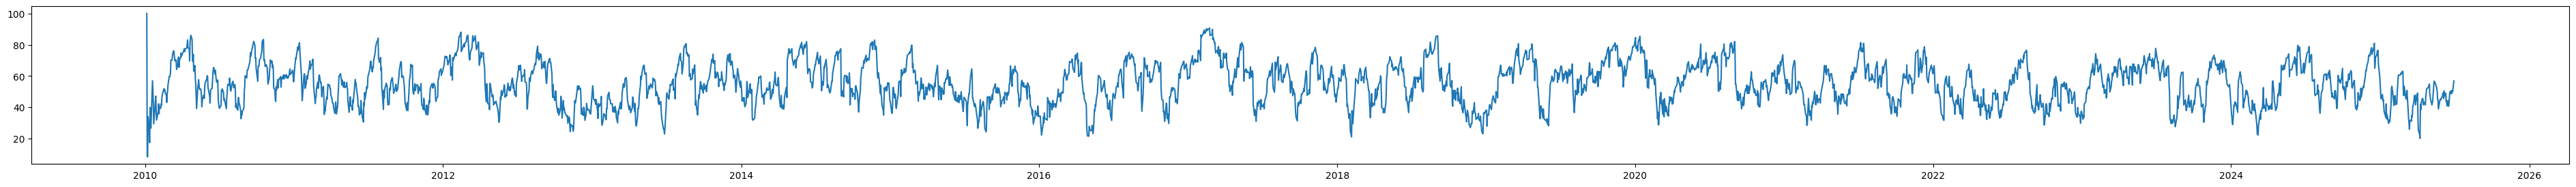

In [8]:
def download_data(stock, start_date, end_date):
    data = pd.DataFrame()
    ticker = stock
    ticker = yf.download(stock, start=start_date, end=end_date)
    data['Price'] = ticker['Close']
    return data

if __name__ == '__main__':
  start = dt.datetime(2010,1,1)
  end = dt.datetime(2025,7,1)
  stock_data = download_data('AAPL', start, end)

  stock_data['return'] = np.log(stock_data['Price']/ stock_data['Price'].shift(1))
  #stock_data = stock_data.dropna()

  stock_data['move'] = stock_data['Price'] - stock_data['Price'].shift(1)

  stock_data['up'] = np.where(stock_data['move'] > 0, stock_data['move'], 0)
  stock_data['down'] = np.where(stock_data['move'] < 0, stock_data['move'], 0)

  #stock_data = stock_data.dropna()

  stock_data['average_gain'] = stock_data['up'].rolling(window=14).mean()
  stock_data['average_loss'] = stock_data['down'].abs().rolling(window=14).mean()
  
  #display(stock_data)
  # more accurate Wilders Method with exponential moving averages to give more weight to latest values.
  stock_data['average_gain'] = stock_data['up'].ewm(alpha=1/14, adjust=False).mean()
  stock_data['average_loss'] = stock_data['down'].abs().ewm(alpha=1/14, adjust=False).mean()

  RS = stock_data['average_gain'] / stock_data['average_loss']

  stock_data['RSI'] = 100 - (100 / (1 + RS))

  stock_data = stock_data.dropna()
  display(stock_data)


  plt.figure(figsize=(48, 3))
  plt.plot(stock_data['RSI'])
  plt.show


C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\1409610930.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


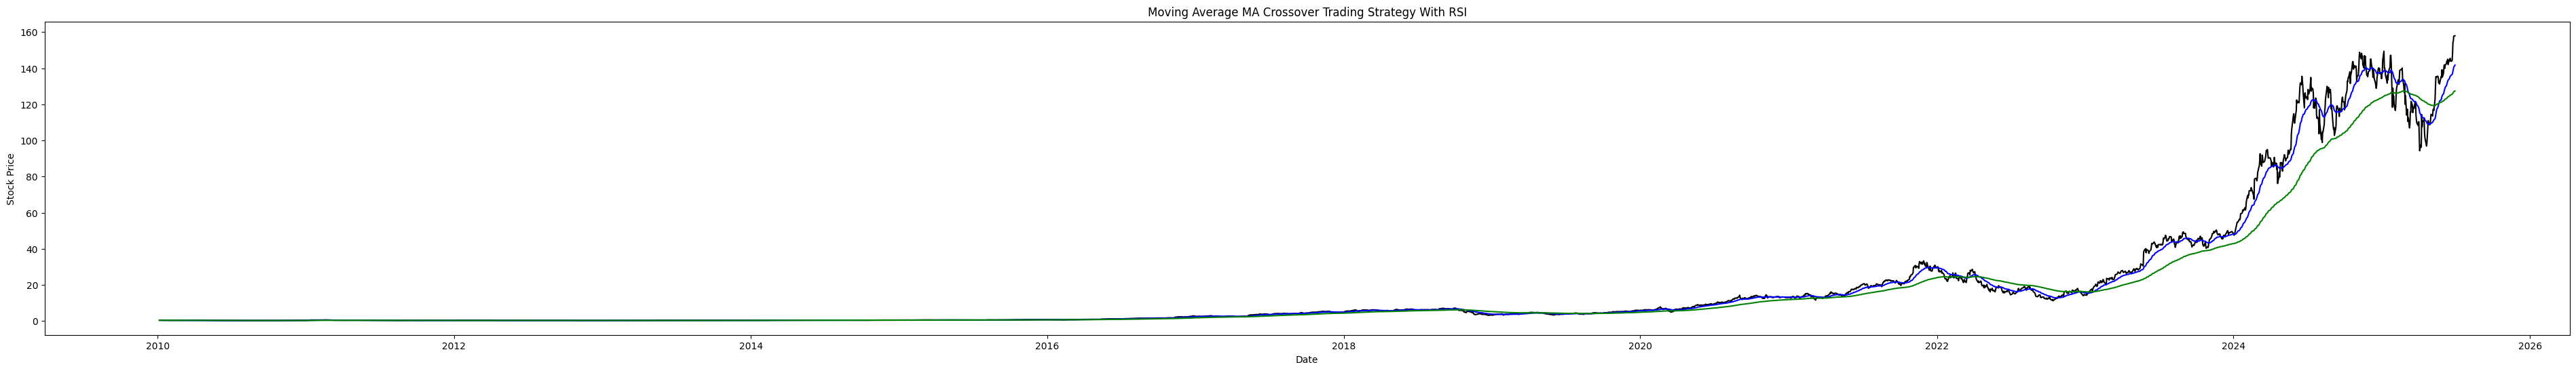

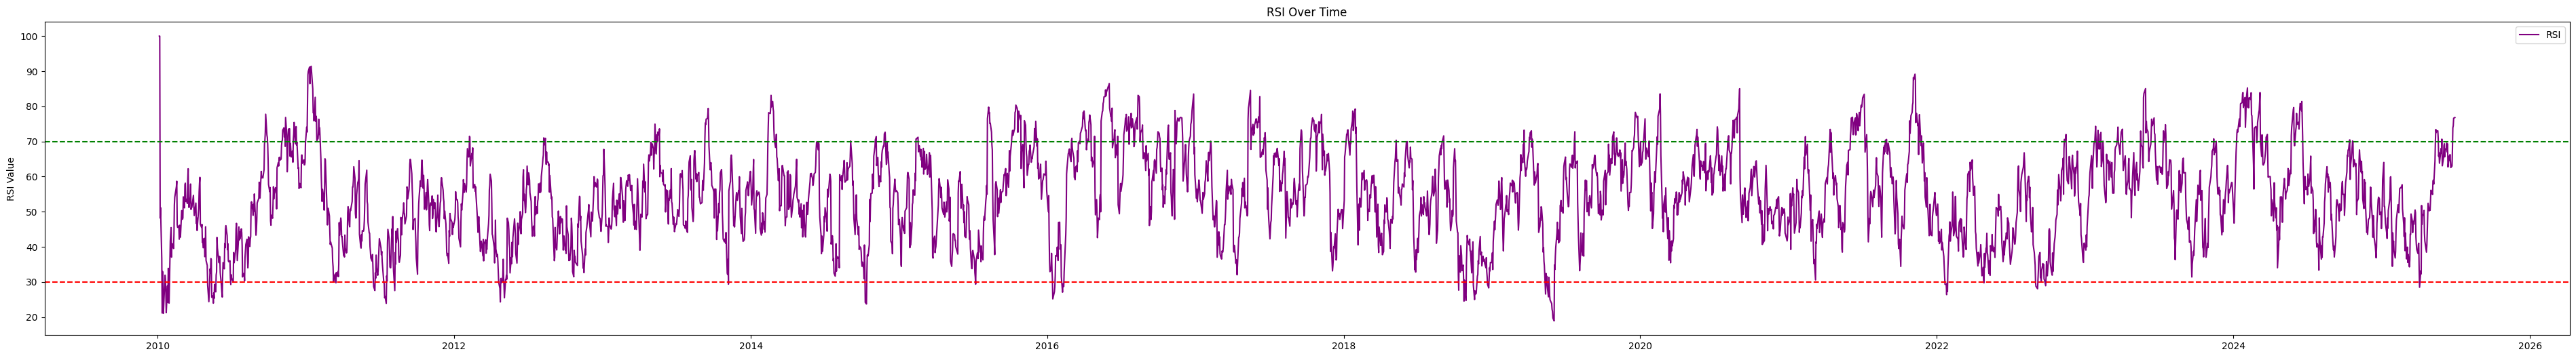

2011-03-16 - OPEN LONG at 0.40
2011-06-20 - CLOSE LONG at 0.36
Capital after trade: $891.04
2013-11-07 - OPEN LONG at 0.34
2014-10-17 - CLOSE LONG at 0.42
Capital after trade: $1087.17
2016-01-15 - OPEN LONG at 0.66
2018-10-25 - CLOSE LONG at 5.15
Capital after trade: $8462.88
2022-01-21 - OPEN LONG at 23.33
2022-03-08 - CLOSE LONG at 21.48
Capital after trade: $7790.77
Profit of the trading strategy: 679.08%
Actual Capital: $7790.77


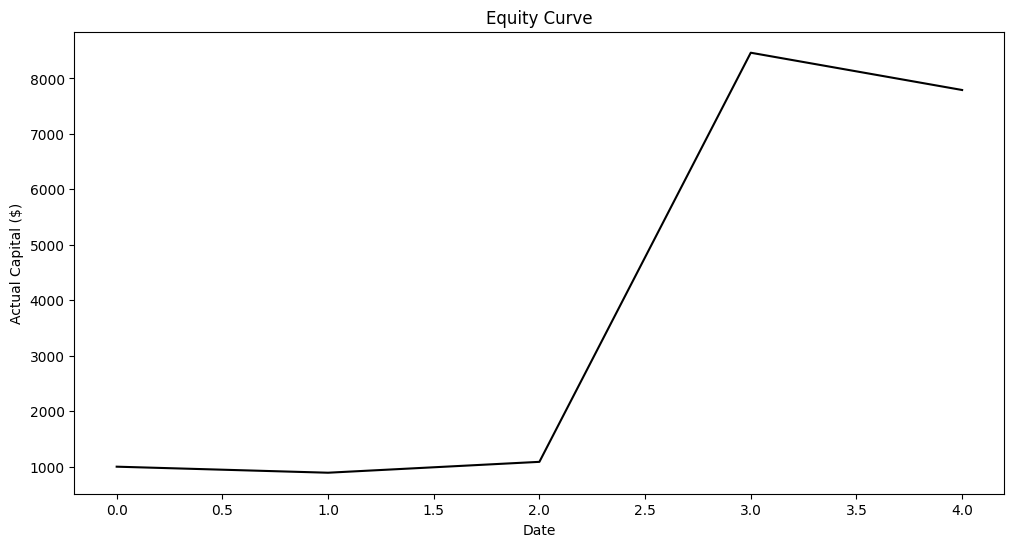

Profit of the trading strategy: 679.08%
Actual Capital: $7790.77
CAGR of the strategy: 14.17%
Profit of the trading strategy: 679.08%
Actual Capital: $7790.77
Sharpe Ratio: 1.06


In [9]:
class MovingAverageRSIStrategy:

  def __init__(self, capital, stock, start_date, end_date, short_period, long_period):
    self.data = None
    self.is_long = False
    self.capital = capital
    self.equity = [capital]
    self.stock = stock
    self.start_date = start_date
    self.end_date = end_date
    self.short_period = short_period
    self.long_period = long_period

  def download_data(self):
    ticker = yf.download(self.stock, start=self.start_date, end=self.end_date)
    stock_data = pd.DataFrame()
    stock_data['Price'] = ticker['Close']
    self.data = stock_data
    return self.data

  def construct_signals(self):
    self.data['short_ma'] = self.data['Price'].ewm(span=self.short_period).mean()
    self.data['long_ma'] = self.data['Price'].ewm(span=self.long_period).mean()
    self.data['move'] = self.data['Price'] - self.data['Price'].shift(1)
    self.data['up'] = np.where(self.data['move'] > 0, self.data['move'], 0)
    self.data['down'] = np.where(self.data['move'] < 0, self.data['move'], 0)
    self.data['average_gain'] = self.data['up'].ewm(alpha=1/14, adjust=False).mean()
    self.data['average_loss'] = self.data['down'].abs().ewm(alpha=1/14, adjust=False).mean()
    RS = self.data['average_gain'] / self.data['average_loss']
    self.data['RSI'] = 100 - (100 / (1 + RS))
    self.data = self.data.dropna()
    return self.data

  def plot_signals(self):
    plt.figure(figsize=(48, 6))
    plt.plot(self.data.Price, label = 'Stock Price', color = 'black')
    plt.plot(self.data.short_ma, label = 'Short MA', color = 'blue')
    plt.plot(self.data.long_ma, label = 'Long MA', color = 'green')
    plt.title('Moving Average MA Crossover Trading Strategy With RSI')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()
    plt.figure(figsize=(48, 6))
    plt.plot(self.data['RSI'], label='RSI', color='purple')
    plt.axhline(30, linestyle='--', color='red')
    plt.axhline(70, linestyle='--', color='green')
    plt.title('RSI Over Time')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.show()

  def simulate(self):
    price_entry = 0

    for index, row in self.data.iterrows():
        # CLOSE TRADE
        if row['short_ma'] < row['long_ma'] and self.is_long:
            capital_now = row['Price'] * self.capital / price_entry
            self.capital = capital_now  #
            self.equity.append(self.capital)
            self.is_long = False
            print(f"{index.date()} - CLOSE LONG at {row['Price']:.2f}")
            print(f"Capital after trade: ${self.capital:.2f}")

        # OPEN TRADE
        elif row['short_ma'] > row['long_ma'] and not self.is_long and row['RSI'] < 30:
            price_entry = row['Price']
            self.is_long = True
            print(f"{index.date()} - OPEN LONG at {row['Price']:.2f}")

  def plot_equity(self):
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    
    print("Actual Capital: $%0.2f" % self.equity[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(self.equity, label='Equity Curve', color='black')
    plt.title('Equity Curve')
    plt.xlabel('Date')
    plt.ylabel('Actual Capital ($)')
    plt.show()
    # Profit calculation
    profit_pct = ((self.equity[-1] - self.equity[0]) / self.equity[0]) * 100
    print("Profit of the trading strategy: %.2f%%" % profit_pct)
    print("Actual Capital: $%0.2f" % self.equity[-1])
    # CAGR calculation
    num_years = (self.end_date - self.start_date).days / 365.25
    cagr = ((self.equity[-1] / self.equity[0]) ** (1 / num_years)) - 1
    print("CAGR of the strategy: %.2f%%" % (cagr * 100))

  def show_stats(self):
    print("Profit of the trading strategy: %.2f%%" % ((float(self.equity[-1])- float(self.equity[0])) / float(self.equity[0]) * 100))
    print("Actual Capital: $%0.2f" % self.equity[-1])
    returns = (self.data['Price'] - self.data['Price'].shift(1)) / self.data['Price'].shift(1)
    ratio = returns.mean() / returns.std()* np.sqrt(252)
    print("Sharpe Ratio: %.2f" % ratio)

if __name__ == '__main__':
  start_date = dt.datetime(2010,1,1)
  end_date = dt.datetime(2025,7,1)
  model = MovingAverageRSIStrategy(1000, 'NVDA', start_date, end_date, 30, 150)
  model.download_data()
  model.construct_signals()
  model.plot_signals()
  model.simulate()
  model.plot_equity()
  model.equity
  model.show_stats()


In [ ]:
import yfinance as yf
import backtrader as bt
import pandas as pd
import datetime as dt

class TestStrategy(bt.Strategy):
    def next(self):
        print(f"{self.datas[0].datetime.date(0)}: {self.datas[0].close[0]}")

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Download data and ensure it's a simple DataFrame
    df = yf.download('AAPL', start='2010-01-01', end='2025-07-01', auto_adjust=False)

    # Ensure columns are single-level and strings
    df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]

    # Drop problematic column
    if 'Adj Close' in df.columns:
        df.drop(columns=['Adj Close'], inplace=True)

    # Reset index to avoid any issues
    df = df.reset_index()
    df.set_index('Date', inplace=True)

    # Confirm correct column names for Backtrader
    print("Columns passed to Backtrader:", df.columns)

    # Feed to backtrader
    data = bt.feeds.PandasData(dataname=df)

    cerebro.adddata(data)
    cerebro.addstrategy(TestStrategy)
    cerebro.run()
    cerebro.plot()


[*********************100%***********************]  1 of 1 completed


Columns passed to Backtrader: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
2010-01-04: 7.643214225769043
2010-01-05: 7.656428813934326
2010-01-06: 7.534643173217773
2010-01-07: 7.520713806152344
2010-01-08: 7.570713996887207
2010-01-11: 7.503929138183594
2010-01-12: 7.4185709953308105
2010-01-13: 7.523213863372803
2010-01-14: 7.479642868041992
2010-01-15: 7.354642868041992
2010-01-19: 7.679999828338623
2010-01-20: 7.56178617477417
2010-01-21: 7.431070804595947
2010-01-22: 7.0625
2010-01-25: 7.252500057220459
2010-01-26: 7.355000019073486
2010-01-27: 7.424285888671875
2010-01-28: 7.117499828338623
2010-01-29: 6.859285831451416
2010-02-01: 6.9546427726745605
2010-02-02: 6.994999885559082
2010-02-03: 7.115356922149658
2010-02-04: 6.85892915725708
2010-02-05: 6.980713844299316
2010-02-08: 6.932857036590576
2010-02-09: 7.006785869598389
2010-02-10: 6.968571186065674
2010-02-11: 7.0953569412231445
2010-02-12: 7.156428813934326
2010-02-16: 7.264286041259766
2010-02-17: 7.

<IPython.core.display.Javascript object>

In [10]:
import yfinance as yf
import backtrader as bt
import pandas as pd

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.close_data = self.data.close

    def next(self):
        print("%s - %s" % (self.data.datetime.date(0), self.close_data[0]))

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Download data
    df = yf.download('AAPL', start='2010-01-01', end='2025-07-01', auto_adjust=False)

    # Fix columns and index
    df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]
    if 'Adj Close' in df.columns:
        df.drop(columns=['Adj Close'], inplace=True)
    df = df.reset_index()
    df.set_index('Date', inplace=True)

    # Feed to Backtrader
    stock_data = bt.feeds.PandasData(dataname=df)
    cerebro.adddata(stock_data)
    cerebro.addstrategy(MyStrategy)

    cerebro.run()
    cerebro.plot()


[*********************100%***********************]  1 of 1 completed


2010-01-04 - 7.643214225769043
2010-01-05 - 7.656428813934326
2010-01-06 - 7.534643173217773
2010-01-07 - 7.520713806152344
2010-01-08 - 7.570713996887207
2010-01-11 - 7.503929138183594
2010-01-12 - 7.4185709953308105
2010-01-13 - 7.523213863372803
2010-01-14 - 7.479642868041992
2010-01-15 - 7.354642868041992
2010-01-19 - 7.679999828338623
2010-01-20 - 7.56178617477417
2010-01-21 - 7.431070804595947
2010-01-22 - 7.0625
2010-01-25 - 7.252500057220459
2010-01-26 - 7.355000019073486
2010-01-27 - 7.424285888671875
2010-01-28 - 7.117499828338623
2010-01-29 - 6.859285831451416
2010-02-01 - 6.9546427726745605
2010-02-02 - 6.994999885559082
2010-02-03 - 7.115356922149658
2010-02-04 - 6.85892915725708
2010-02-05 - 6.980713844299316
2010-02-08 - 6.932857036590576
2010-02-09 - 7.006785869598389
2010-02-10 - 6.968571186065674
2010-02-11 - 7.0953569412231445
2010-02-12 - 7.156428813934326
2010-02-16 - 7.264286041259766
2010-02-17 - 7.23392915725708
2010-02-18 - 7.247499942779541
2010-02-19 - 7.2024

<IPython.core.display.Javascript object>

In [ ]:
class MovingAverageStrategybt(bt.Strategy):
  params = (('period_fast',30),('period_slow',200))

  def __init__(self):
    self.close_data = self.data.close
    self.fast_sma = bt.indicators.SMA(self.close_data, period=self.params.period_fast)
    self.slow_sma = bt.indicators.SMA(self.close_data, period=self.params.period_slow)

  def next(self):
    if not self.position:
      if self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] < self.slow_sma[-1]:
        print('BUY')
        self.buy()
    else:
      if self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] > self.slow_sma[-1]:
        print('SELL')
        self.sell()

if __name__ == '__main__':
   cerebro = bt.Cerebro()
   # Download data
   df = yf.download('MSFT', start='2000-01-01', end='2025-07-01', auto_adjust=False)
    # Fix columns and index
   df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]
   if 'Adj Close' in df.columns:
       df.drop(columns=['Adj Close'], inplace=True)
   df = df.reset_index()
   df.set_index('Date', inplace=True)
    # Feed to Backtrader
   stock_data = bt.feeds.PandasData(dataname=df)
   cerebro.adddata(stock_data)
   cerebro.addstrategy(MovingAverageStrategybt)

   cerebro.addobserver(bt.observers.Value)
   cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate= 0.0)
   cerebro.addanalyzer(bt.analyzers.Returns)
   cerebro.addanalyzer(bt.analyzers.DrawDown) #to measure maximum drawdown


   results = cerebro.run()
   print('Sharpe Ratio: %.2f' % results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
   print('Returns: %.2f%%' % results[0].analyzers.returns.get_analysis()['rnorm100'])
   print('Max Drawdown: %.2f%%' % results[0].analyzers.drawdown.get_analysis()['drawdown'])

   print()
   cerebro.plot()

[*********************100%***********************]  1 of 1 completed


BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
Sharpe Ratio: 0.43
Returns: 0.18%
Max Drawdown: 0.00%



In [11]:
class MovingAverageStrategybt(bt.Strategy):
    params = (('period_fast', 30), ('period_slow', 200))

    def __init__(self):
        self.fast_sma = bt.indicators.SMA(self.data.close, period=self.params.period_fast)
        self.slow_sma = bt.indicators.SMA(self.data.close, period=self.params.period_slow)
        self.crossover = bt.ind.CrossOver(self.fast_sma, self.slow_sma)

    def next(self):
        if not self.position and self.crossover > 0:
            print(f"{self.datas[0].datetime.date(0)} BUY at {self.data.close[0]:.2f}")
            self.buy()
        elif self.position and self.crossover < 0:
            print(f"{self.datas[0].datetime.date(0)} SELL at {self.data.close[0]:.2f}")
            self.sell()

if  __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Download and fix data
    df = yf.download('MSFT', start='2000-01-01', end='2025-07-01', auto_adjust=False)

    # FLATTEN column headers if they're tuples
    df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]

    # Drop unnecessary columns and fix index
    if 'Adj Close' in df.columns:
        df.drop(columns=['Adj Close'], inplace=True)
    df.index.name = 'Date'

    # Feed to backtrader
    data = bt.feeds.PandasData(dataname=df)
    cerebro.adddata(data)
    cerebro.addstrategy(MovingAverageStrategybt)

    # Add analyzers
    cerebro.addobserver(bt.observers.Value)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.04)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.broker.set_cash(3000)
    # Run backtest
    print('Initial Capital: $%.2f' % cerebro.broker.getvalue())

    cerebro.broker.setcommission(commission=0.01)
    results = cerebro.run()
    strat = results[0]
    print('Sharpe Ratio: %.2f' % strat.analyzers.sharperatio.get_analysis().get('sharperatio', float('nan')))
    print('Returns: %.2f%%' % strat.analyzers.returns.get_analysis().get('rnorm100', float('nan')))
    print('Max Drawdown: %.2f%%' % strat.analyzers.drawdown.get_analysis().get('drawdown', float('nan')))
    print('Final Capital: $%.2f' % cerebro.broker.getvalue())

    cerebro.plot()

[*********************100%***********************]  1 of 1 completed


Initial Capital: $3000.00
2001-05-03 BUY at 34.26
2001-09-17 SELL at 26.45
2001-11-28 BUY at 31.40
2002-02-15 SELL at 30.11
2002-11-20 BUY at 28.31
2003-02-11 SELL at 23.22
2003-04-25 BUY at 25.22
2003-05-02 SELL at 26.10
2003-05-07 BUY at 25.99
2003-05-08 SELL at 25.74
2003-05-09 BUY at 26.36
2003-05-21 SELL at 24.03
2003-07-11 BUY at 27.31
2003-12-03 SELL at 25.67
2004-01-02 BUY at 27.45
2004-03-10 SELL at 25.37
2004-06-29 BUY at 28.50
2004-12-28 SELL at 26.95
2005-08-11 BUY at 27.27
2005-10-14 SELL at 24.67
2005-11-16 BUY at 27.74
2006-05-04 SELL at 23.44
2006-09-19 BUY at 26.86
2007-08-22 SELL at 28.22
2007-10-18 BUY at 31.16
2008-02-21 SELL at 28.10
2009-06-11 BUY at 22.83
2010-06-07 SELL at 25.29
2010-12-21 BUY at 28.07
2011-03-29 SELL at 25.49
2011-07-29 BUY at 27.40
2011-08-22 SELL at 23.98
2011-10-14 BUY at 27.27
2011-12-16 SELL at 26.00
2012-01-06 BUY at 28.11
2012-10-15 SELL at 29.51
2013-04-23 BUY at 30.60
2015-02-13 SELL at 43.87
2015-05-18 BUY at 48.01
2015-09-09 SELL at 

<IPython.core.display.Javascript object>

### Average True Range Indicator
### TR = max{H-L,abs(H-Cp),abs(L-Cp)}
### ATR = avg14(TR)
### size = (capital x risk factor)/ATR -- helps to avoid stocks with high volatility




In [12]:
def download_data(stock, start_date, end_date):
    data = pd.DataFrame()
    data = yf.download(stock, start=start_date, end=end_date)
    return data

def calculate_atr(data):
  high_low = data['High'] - data['Low']
  high_close = np.abs(data['High'] - data['Close'].shift())
  low_close = np.abs(data['Low'] - data['Close'].shift())
  #print(high_low)
  #print(high_close)
  #print(low_close)
  ranges = pd.concat([high_low, high_close, low_close], axis=1)
  true_range = np.max(ranges, axis=1)
  #print(ranges)
  #print(true_range)
  atr = true_range.rolling(14).mean()
  atr = atr.dropna()
  print(atr)
  return atr

if __name__ == '__main__':
  start = dt.datetime(2010,1,1)
  end = dt.datetime(2025,7,1)
  stock_data = download_data('AAPL', start, end)
  plt.plot(stock_data['Close'])
  plt.figure(figsize=(24, 6))
  #plt.show()
  #print(stock_data)
  atr_values = calculate_atr(stock_data)
  fig, (ax1,ax2)= plt.subplots(2,1, sharex=True, figsize=(18,12))
  fig.suptitle("Stock Prices and ATR Indicator")
  ax1.plot(stock_data['Close'])
  ax2.plot(atr_values)
  plt.show()


C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\428822331.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Date
2010-01-22    0.149200
2010-01-25    0.159557
2010-01-26    0.178405
2010-01-27    0.192493
2010-01-28    0.205852
                ...   
2025-06-24    4.016869
2025-06-25    3.961931
2025-06-26    3.860617
2025-06-27    3.728625
2025-06-30    3.882023
Length: 3883, dtype: float64


<IPython.core.display.Javascript object>

In [13]:
def download_stocks(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = ticker_data['Close']
    return data

def calculate_momentum(data):
  log_data = np.log(data)
  x_data = np.arange(len(log_data))
  beta, _, rvalue, _, _ = linregress(x_data, log_data)
  b = (1+beta)**252
  return b * (rvalue**2)

if __name__ == '__main__':
  start_date = dt.datetime(2012, 1, 1)
  end_date = dt.datetime(2025, 7, 1)
  tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'IBM', 'XOM']
  stocks_data = download_stocks(tickers, start_date, end_date)
  print(stocks_data)
  momentums = pd.DataFrame(columns = stocks_data.columns)
  for ticker in tickers:
    momentums[ticker] = stocks_data[ticker].rolling(90).apply(calculate_momentum, raw = False)
  #momentum_values = calculate_momentum(stocks_data)
    plt.figure(figsize=(12, 6))
    plt.xlabel('Days')
    plt.ylabel('Stock Price')

    bests = momentums.max().sort_values(ascending=False).index[:5]
    print(momentums.max().sort_values(ascending=False)[:5])
    for best in bests:
      end = momentums[best].index.get_loc(momentums[best].idxmax())
      returns = np.log(stocks_data[best].iloc[end - 90: end])
      x = np.arange(len(returns))
      slope, intercept, r_value, p_value, std_err = linregress(x, returns)
      plt.plot(np.arange(len(stocks_data[best][end - 90: end + 90])), stocks_data[best][end - 90: end + 90], label=best)
      plt.plot(x,np.e**(intercept + slope*x))
    plt.show()
    print(bests)
  print(momentums)



C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3757106624.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3757106624.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3757106624.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3757106624.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data

                  AAPL        MSFT       GOOGL        AMZN        NVDA  \
Date                                                                     
2012-01-03   12.345170   21.039204   16.552629    8.951500    0.321845   
2012-01-04   12.411516   21.534342   16.624025    8.875500    0.325513   
2012-01-05   12.549311   21.754398   16.393423    8.880500    0.337204   
2012-01-06   12.680494   22.092342   16.169790    9.130500    0.333307   
2012-01-09   12.660382   21.801554   15.484214    8.928000    0.333307   
...                ...         ...         ...         ...         ...   
2025-06-24  200.072937  490.109985  166.770004  212.770004  147.899994   
2025-06-25  201.331512  492.269989  170.679993  211.990005  154.309998   
2025-06-26  200.772141  497.450012  173.539993  217.119995  155.020004   
2025-06-27  200.852051  495.940002  178.529999  223.300003  157.750000   
2025-06-30  204.937408  497.410004  176.229996  219.389999  157.990005   

                  TSLA         IBM   

<IPython.core.display.Javascript object>

AAPL     4.623941
MSFT         None
GOOGL        None
AMZN         None
NVDA         None
dtype: object


C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\3757106624.py:32: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  end = momentums[best].index.get_loc(momentums[best].idxmax())


KeyError: NaT

In [14]:
def download_stocks(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = ticker_data['Close']
    return data

def calculate_momentum(series):
    series = series.dropna()
    if len(series) < 2:
        return np.nan
    log_data = np.log(series)
    x_data = np.arange(len(log_data))
    slope, _, r_value, _, _ = linregress(x_data, log_data)
    annualized_return = (1 + slope) ** 252
    return annualized_return * (r_value ** 2)

# --- Main Execution ---
if __name__ == '__main__':
    start_date = dt.datetime(2010, 1, 1)
    end_date = dt.datetime(2025, 7, 1)
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'IBM', 'XOM']

    # Download stock prices
    stocks_data = download_stocks(tickers, start_date, end_date)

    # Calculate momentum
    momentums = pd.DataFrame(index=stocks_data.index, columns=stocks_data.columns)
    for ticker in tickers:
        momentums[ticker] = stocks_data[ticker].rolling(90).apply(calculate_momentum, raw=False)

    # Plotting top 5 stocks by max momentum
    plt.figure(figsize=(12, 6))
    plt.xlabel('Days')
    plt.ylabel('Stock Price')

    bests = momentums.max().sort_values(ascending=False).index[:5]
    print("Top 5 stocks by max momentum:")
    print(momentums.max().sort_values(ascending=False).head(5))

    for best in bests:
        series = momentums[best].dropna()
        if series.empty:
            continue

        max_date = series.idxmax()
        if pd.isna(max_date):
            continue

        try:
            end = momentums.index.get_loc(max_date)
            start = max(0, end - 90)
            stop = min(len(stocks_data), end + 90)

            returns = np.log(stocks_data[best].iloc[start:end])
            x = np.arange(len(returns))
            slope, intercept, r_value, p_value, std_err = linregress(x, returns)

            plt.plot(np.arange(stop - start), stocks_data[best].iloc[start:stop].values, label=best)
            plt.plot(x, np.exp(intercept + slope * x), linestyle='dashed')
        except Exception as e:
            print(f"Skipping {best} due to error: {e}")
            continue

    plt.legend()
    plt.title("Top 5 Stocks by Momentum")
    plt.show()

    # Optional: Print final momentum DataFrame
    print("\nFinal momentum values (latest row):")
    print(momentums.tail(1).T.sort_values(by=momentums.tail(1).index[0], ascending=False))

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\2160261441.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\2160261441.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\2160261441.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\YOGA\AppData\Local\Temp\ipykernel_16476\2160261441.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data

<IPython.core.display.Javascript object>

Top 5 stocks by max momentum:
TSLA    57.193992
NVDA    11.751908
AAPL     4.838051
XOM      4.412692
AMZN     3.865647
dtype: float64

Final momentum values (latest row):
Date   2025-06-30
MSFT     1.538338
NVDA     0.843399
TSLA     0.788233
IBM      0.592573
AAPL     0.284994
AMZN     0.100311
XOM      0.046832
GOOGL    0.040676


In [ ]:
def download_stocks(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        ticker_data = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = ticker_data['Close']
    return data

def calculate_momentum(series):
    log_data = np.log(series)
    x_data = np.arange(len(log_data))
    beta, _, r_value, _, _ = linregress(x_data, log_data)
    annualized_return = (1 + beta) ** 252
    return annualized_return * (r_value ** 2)

class momentum(bt.Indicator):
  lines = ('momentum_trend',)
  params = (('period',90),)

  def __init__(self):
    self.adminperiod = self.params.period

  def next(self):
    returns = np.log(self.data.get(size = self.params.period))
    x = np.arange(len(returns))
    beta, _, r_value, _, _ = linregress(x, returns)
    self.lines.momentum_trend[0] = (1+slope)**252 #index 0 points to the actual value in backtrader framework

class MomentumStrategy(bt.Strategy):

  def __init__(self):
    self.counter = 0
    self.indicator = {}
    self.sorted_data = []
    self.spy =self.data[0]
    self.stocks = self.data[1:]

    for stock in stocks:
      self.indicator[stock] = {}
      self.indicators[stock]['momentum'] = Momentum(stock.close, period = 90)
      self.indicators['sma100'] = bt.indicators.MovingAverageSimple(stock.close, period = 100)
      self.indicators['atr20'] = bt.indicators.ATR(stock.close, period = 20)

    self.sma200 = bt.indicators.MovingAverageSimple(self.spy.close, period = 100)
    self.sma50 = bt.indicators.MovingAverageSimple(self.spy, period = 50)




# --- Main Execution ---
if __name__ == '__main__':
    start_date = dt.datetime(2010, 1, 1)
    end_date = dt.datetime(2025, 7, 1)
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'IBM', 'XOM']

    # Download stock prices
    stocks_data = download_stocks(tickers, start_date, end_date)

    # Calculate momentum
    momentums = pd.DataFrame(index=stocks_data.index, columns=stocks_data.columns)
    for ticker in tickers:
        momentums[ticker] = stocks_data[ticker].rolling(90).apply(calculate_momentum, raw=False)

    # Plotting top 5 stocks by max momentum
    plt.figure(figsize=(12, 6))
    plt.xlabel('Days')
    plt.ylabel('Stock Price')

    bests = momentums.max().sort_values(ascending=False).index[:5]
    print("Top 5 stocks by max momentum:")
    print(momentums.max().sort_values(ascending=False).head(5))

    for best in bests:
        series = momentums[best].dropna()
        if series.empty:
            continue

        max_date = series.idxmax()
        if pd.isna(max_date):
            continue

        try:
            end = momentums.index.get_loc(max_date)
            start = max(0, end - 90)
            stop = min(len(stocks_data), end + 90)

            returns = np.log(stocks_data[best].iloc[start:end])
            x = np.arange(len(returns))
            slope, intercept, r_value, p_value, std_err = linregress(x, returns)

            plt.plot(np.arange(stop - start), stocks_data[best].iloc[start:stop].values, label=best)
            plt.plot(x, np.exp(intercept + slope * x), linestyle='dashed')
        except Exception as e:
            print(f"Skipping {best} due to error: {e}")
            continue

    plt.legend()
    plt.title("Top 5 Stocks by Momentum")
    plt.show()

    # Optional: Print final momentum DataFrame
    print("\nFinal momentum values (latest row):")
    print(momentums.tail(1).T.sort_values(by=momentums.tail(1).index[0], ascending=False))